In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../train.csv')
df

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
...,...,...,...,...,...,...
9319,boostcamp-sts-v1-train-9319,petition-sampled,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,0.2,0.0
9320,boostcamp-sts-v1-train-9320,petition-sampled,여성가족부의 폐지를 원합니드,여성가족부 폐지를 청원 합니다.,4.2,1.0
9321,boostcamp-sts-v1-train-9321,petition-sampled,국회의원들 월급좀 줄여주세요,공무원 봉급좀 줄이지좀 마세요,0.6,0.0
9322,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,3.2,1.0


In [3]:
df['binary-label'].value_counts()

binary-label
0.0    5692
1.0    3632
Name: count, dtype: int64

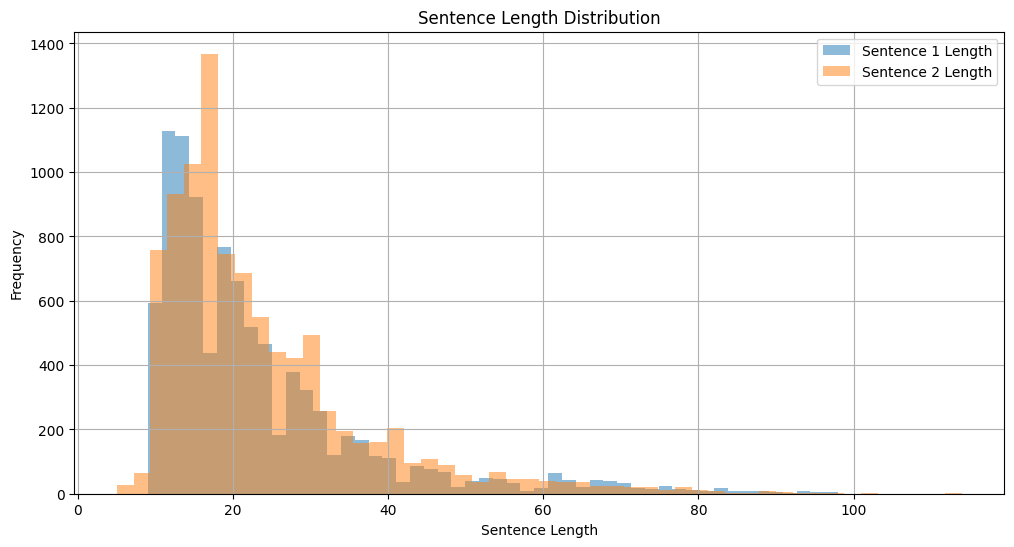

In [4]:
import matplotlib.pyplot as plt

# 문장의 길이를 시각화하는 함수
def plot_sentence_lengths(df):
    plt.figure(figsize=(12, 6))

    # sentence1 길이 히스토그램
    plt.hist(df['sentence_1'].apply(len), bins=50, alpha=0.5, label='Sentence 1 Length')
    
    # sentence2 길이 히스토그램
    plt.hist(df['sentence_2'].apply(len), bins=50, alpha=0.5, label='Sentence 2 Length')

    # 제목과 레이블
    plt.title('Sentence Length Distribution')
    plt.xlabel('Sentence Length')
    plt.ylabel('Frequency')
    
    # 범례 추가
    plt.legend(loc='upper right')
    
    # 그리드 추가
    plt.grid(True)
    
    # 그래프 표시
    plt.show()

# 시각화 함수 실행 (df는 사용자 데이터프레임)
plot_sentence_lengths(df)

In [11]:
from hanspell import spell_checker
import re
from pykospacing import Spacing

from soynlp.normalizer import *

print()
# 1. 띄어쓰기 처리
def correct_spacing(text):
    spacing = Spacing()
    return spacing(text)

# 2. 맞춤법 교정
def correct_spelling(text):
    import importlib
    import hanspell
    importlib.reload(hanspell)


    result = spell_checker.check(text)
    
    return result.as_dict()['checked'] 

# 3. 정규화 (ㅋㅋ, ㅎㅎ 처리)
def normalize_laughter(text):
    text = repeat_normalize(text, num_repeats=2)
    return text

def remove_punctuation(text):
    # 문장부호를 제거하는 정규식
    return re.sub(r'[^\w\s]', '', text)

def to_lowercase(text):
    # 모든 알파벳을 소문자로 변환
    return text.lower()

In [6]:
punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'
punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-", "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 'β': 'beta', '∅': '', '³': '3', 'π': 'pi', } 


def clean(text, punct, mapping):
    for p in mapping:
        text = text.replace(p, mapping[p])
    
    for p in punct:
        text = text.replace(p, f' {p} ')
    
    specials = {'\u200b': ' ', '…': ' ... ', '\ufeff': '', 'करना': '', 'है': ''}
    for s in specials:
        text = text.replace(s, specials[s])
    
    return text.strip()


import re


def clean_str(text):
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '[^\w\s\n]'         # 특수기호제거
    text = re.sub(pattern=pattern, repl='', string=text)
    text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]','', string=text)
    text = re.sub('\n', '.', string=text)
    return text 

In [7]:
normalize_laughter('ㅎㅇㅎㅇㅎㅇ')

'ㅎㅇㅎㅇㅎㅇ'

In [12]:
correct_spelling('안녕 하세요. 저는 한국인 입니다. 이문장은 한글로 작성됬습니다.')

'안녕하세요. 저는 한국인입니다. 이 문장은 한글로 작성됐습니다.'

In [13]:
def preprocess_text(text):
    text = clean_str(text)  # 1. 이메일, URL 등 불필요한 정보 제거
    text = remove_punctuation(text)  # 2. 문장부호 제거
    text = correct_spacing(text)  # 3. 띄어쓰기 처리
    text = correct_spelling(text)  # 4. 맞춤법 교정
    text = normalize_laughter(text)  # 5. 정규화 (ㅋㅋ, ㅎㅎ 처리)
    text = clean(text, punct, punct_mapping)  # 6. 특수 문자 처리 및 매핑
    text = to_lowercase(text)  # 7. 소문자로 변환
    return text

In [14]:
df['sentence_1_re'] = df['sentence_1'].apply(preprocess_text)
df['sentence_2_re'] = df['sentence_2'].apply(preprocess_text)
df

,id,source,sentence_1,sentence_2,label,binary-label,sentence_1_re,sentence_2_re
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0,스릴도 있고 반전도 있고 여느 한국 영화 쓰레기들하고는 차원이 다르네요,반전도 있고 사랑도 있고 재미도 있네요
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0,앗 제가 접근 권한이 없다고 뜹니다,오 액 세스 권한이 없다고 합니다
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0,주택청약 조건 변경해 주세요,주택청약 무주택 기준 변경해 주세요
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0,입사 후 처음 대면으로 만나 반가웠습니다,화상으로만 보다 가 리얼로 만나니 정말 반가웠습니다
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0,뿌듯 뿌듯하네요,꼬옥 실제로 한 번 뵈어요 뿌뿌뿌
...,...,...,...,...,...,...,...,...
9319,boostcamp-sts-v1-train-9319,petition-sampled,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,0.2,0.0,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야 합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요
9320,boostcamp-sts-v1-train-9320,petition-sampled,여성가족부의 폐지를 원합니드,여성가족부 폐지를 청원 합니다.,4.2,1.0,여성가족부의 폐지를 원합 니드,여성가족부 폐지를 청원합니다
9321,boostcamp-sts-v1-train-9321,petition-sampled,국회의원들 월급좀 줄여주세요,공무원 봉급좀 줄이지좀 마세요,0.6,0.0,국회의원들 월급 좀 줄여주세요,공무원 봉급 좀 줄이지 좀 마세요
9322,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,3.2,1.0,오늘 못한 점심은 다음에 다시 트라이 하기로 해요,오늘 못 먹은 밥은 꼭 담에 먹기로 하고요


In [ ]:
df.to_